# Check max flow = 454.54526   (Monkaa = 23540.129)

In [7]:
import os
from ptlflow.utils.flow_utils import flow_read
from ptlflow.utils.external.flowpy import replace_nans
import numpy as np
from tqdm import tqdm

data_path = '/workspace/data/vimeo/train'
data_folder = os.listdir(data_path)
data_folder.sort()
master_max = 0

for scene in tqdm(data_folder, ncols=80):
    flow_path = os.path.join(data_path,scene,'flow/flows',f'{scene}.flo')
    flow = flow_read(flow_path)
    complex_flow = flow[..., 0] + 1j * flow[..., 1]
    complex_flow, nan_mask = replace_nans(complex_flow)
    radius, angle = np.abs(complex_flow), np.angle(complex_flow)
    flow_max_radius = np.max(radius)
    if flow_max_radius > master_max:
        master_max = flow_max_radius

print(master_max)

100%|██████████████████████████████████| 183402/183402 [11:31<00:00, 265.24it/s]

454.54526


In [15]:
# train = 210.29102

data_path = '/workspace/data/Gopro_my/test'
data_folder = os.listdir(data_path)
data_folder.sort()
master_max = 0

for scene in tqdm(data_folder, ncols=80):
    flow_path = os.path.join(data_path,scene,'flow/flows',f'{scene}.flo')
    flow = flow_read(flow_path)
    complex_flow = flow[..., 0] + 1j * flow[..., 1]
    complex_flow, nan_mask = replace_nans(complex_flow)
    radius, angle = np.abs(complex_flow), np.angle(complex_flow)
    flow_max_radius = np.max(radius)
    if flow_max_radius > master_max:
        master_max = flow_max_radius

print(master_max)

100%|███████████████████████████████████████| 2222/2222 [00:58<00:00, 37.91it/s]

206.48477


In [16]:
data_path = '/workspace/data/Monkaa_my/train'
data_folder = os.listdir(data_path)
data_folder.sort()
print('none')
for scene in tqdm(data_folder, ncols=80):
    flow_path = os.path.join(data_path,scene,'flow/flows',f'{scene}.pfm')
    flow = flow_read(flow_path)
    complex_flow = flow[..., 0] + 1j * flow[..., 1]
    complex_flow, nan_mask = replace_nans(complex_flow)
    radius, angle = np.abs(complex_flow), np.angle(complex_flow)
    flow_max_radius = np.max(radius)
    break


none


  0%|                                                 | 0/15046 [00:00<?, ?it/s]


In [13]:
print(master_max)

210.29102


# VIMEO

In [1]:
import os,glob
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import cv2

In [2]:
vimeo_path = '/workspace/data/vimeo_septuplet/sequences'
vimeo_folder = os.listdir(vimeo_path)
vimeo_folder.sort()

num = 0
for folder in vimeo_folder:
    scene_path = os.path.join(vimeo_path,folder)
    scene_folder = os.listdir(scene_path)
    for s in scene_folder:

        num +=1

print(num)
    


91701


In [3]:
vimeo_path = '/workspace/data/vimeo/train'
vimeo_folder = os.listdir(vimeo_path)
vimeo_folder.sort()
print(len(vimeo_folder))

183402


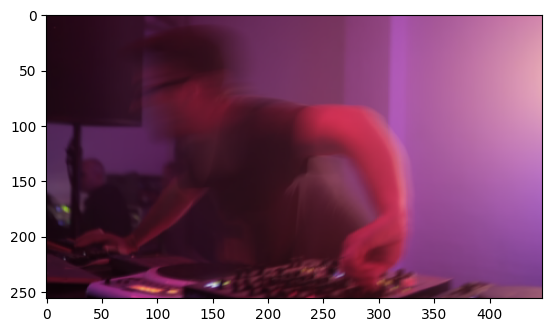

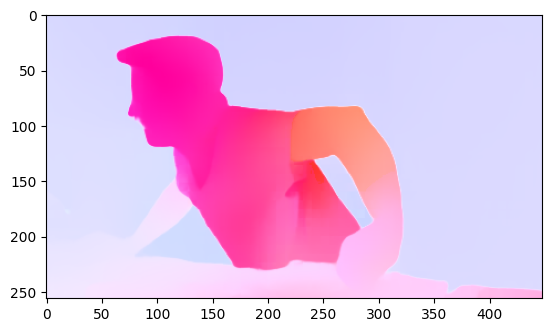

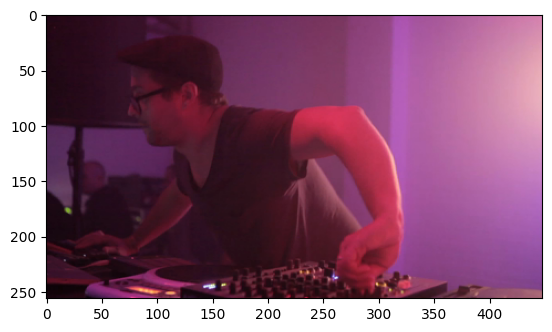

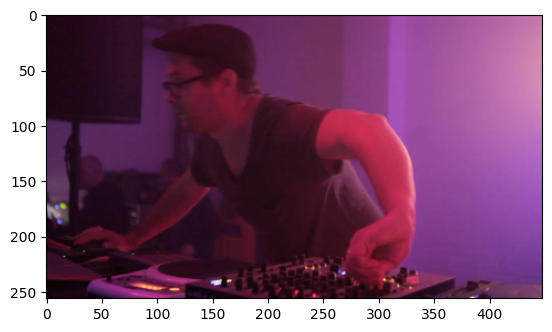

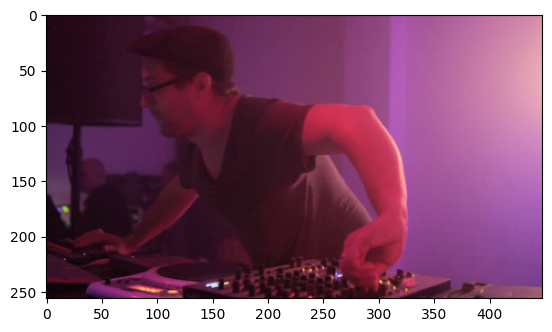

In [32]:
index = 3000
img_name = int(vimeo_folder[index])
blur_img_path = os.path.join(vimeo_path,f'{vimeo_folder[index]}','blur',f'{img_name:06d}.png')
left_img_path = os.path.join(vimeo_path,f'{vimeo_folder[index]}','left',f'{img_name:06d}.png')
right_img_path = os.path.join(vimeo_path,f'{vimeo_folder[index]}','right',f'{img_name:06d}.png')
sharp_img_path = os.path.join(vimeo_path,f'{vimeo_folder[index]}','sharp',f'{img_name:06d}.png')
flow_img_path = os.path.join(vimeo_path,f'{vimeo_folder[index]}','flow/flows_viz',f'{img_name:06d}.png')

blur_img = Image.open(blur_img_path)
plt.imshow(blur_img)
plt.show()
flow_img = Image.open(flow_img_path)
plt.imshow(flow_img)
plt.show()
left_img = Image.open(left_img_path)
plt.imshow(left_img)
plt.show()
right_img = Image.open(right_img_path)
plt.imshow(right_img)
plt.show()

sharp_img = Image.open(sharp_img_path)
plt.imshow(sharp_img)
plt.show()

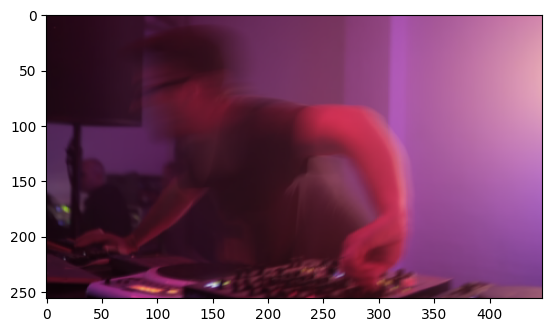

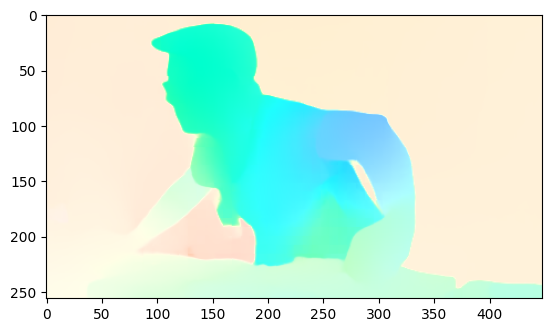

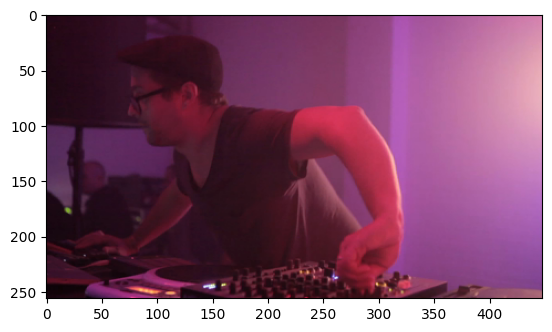

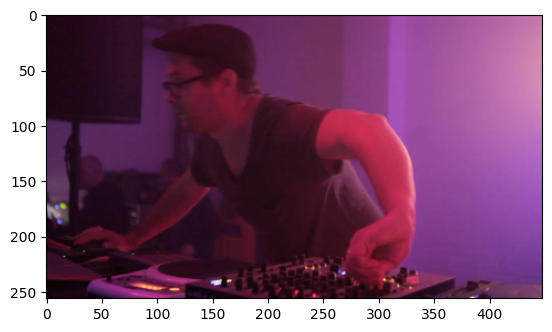

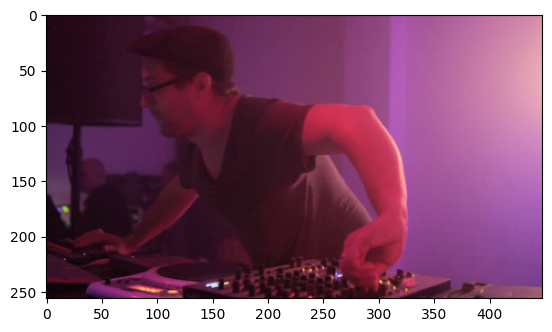

In [33]:
index = index + 91701
img_name = int(vimeo_folder[index])
blur_img_path = os.path.join(vimeo_path,f'{vimeo_folder[index]}','blur',f'{img_name:06d}.png')
left_img_path = os.path.join(vimeo_path,f'{vimeo_folder[index]}','left',f'{img_name:06d}.png')
right_img_path = os.path.join(vimeo_path,f'{vimeo_folder[index]}','right',f'{img_name:06d}.png')
sharp_img_path = os.path.join(vimeo_path,f'{vimeo_folder[index]}','sharp',f'{img_name:06d}.png')
flow_img_path = os.path.join(vimeo_path,f'{vimeo_folder[index]}','flow/flows_viz',f'{img_name:06d}.png')

blur_img = Image.open(blur_img_path)
plt.imshow(blur_img)
plt.show()
flow_img = Image.open(flow_img_path)
plt.imshow(flow_img)
plt.show()
left_img = Image.open(left_img_path)
plt.imshow(left_img)
plt.show()
right_img = Image.open(right_img_path)
plt.imshow(right_img)
plt.show()

sharp_img = Image.open(sharp_img_path)
plt.imshow(sharp_img)
plt.show()

# setting train data path

In [16]:
# mother_path = '/workspace/data/vimeo/train'

# with open('train.txt', 'a') as f:

#     for img_num in vimeo_folder:
#         img_path = os.path.join(mother_path,img_num)
#         blur_path = os.path.join(img_path,'blur',f'{img_num}.png')
#         f.write(f'{blur_path}\n')
        

In [29]:
blur_img = np.array(blur_img)
flow_img = np.array(flow_img)

blur_img = cv2.resize(blur_img,(960,540))
flow_img = cv2.resize(flow_img,(960,540))

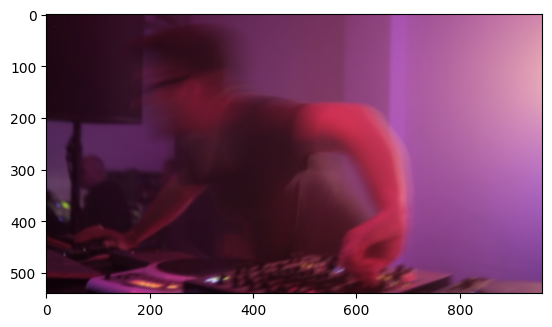

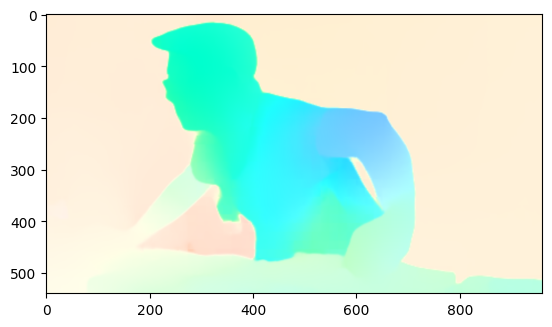

In [30]:
plt.imshow(blur_img)
plt.show()
plt.imshow(flow_img)
plt.show()

# make flow2

In [12]:
import shutil, os, glob

mother_path = '/workspace/data/Gopro_my_2/train'
mother_folder = os.listdir(mother_path)
mother_folder.sort()

future_mother_folder = mother_folder[:2103]
past_mother_folder = mother_folder[2103:-1]
print(len(future_mother_folder))
print(len(past_mother_folder))

for idx,folder in enumerate(past_mother_folder):
    flow_path = os.path.join(mother_path,folder,'flow')

    dst_path = os.path.join(mother_path,future_mother_folder[idx],'flow2')
    if os.path.exists(dst_path):
        shutil.rmtree(dst_path)
    shutil.copytree(flow_path,dst_path)

    

2103
2103


In [27]:
import shutil, os, glob

mother_path = '/workspace/data/Gopro_my_2/test'
mother_folder = os.listdir(mother_path)
mother_folder.sort()

future_mother_folder = mother_folder[:1111]
past_mother_folder = mother_folder[1111:]
print(len(future_mother_folder))
print(len(past_mother_folder))

for idx,folder in enumerate(past_mother_folder):
    flow_path = os.path.join(mother_path,folder,'flow')

    dst_path = os.path.join(mother_path,future_mother_folder[idx],'flow2')
    if os.path.exists(dst_path):
        shutil.rmtree(dst_path)
    shutil.copytree(flow_path,dst_path)
    

    

1111
1111


# Rename

In [19]:
import shutil, os, glob

mother_path = '/workspace/data/Gopro_my_2/train'
mother_folder = os.listdir(mother_path)
mother_folder.sort()

future_mother_folder = mother_folder[:2103]
print(len(future_mother_folder))


for idx,folder in enumerate(future_mother_folder):
    flows_path = os.path.join(mother_path,folder,'flow2','flows')
    flow2_path = glob.glob(f'{flows_path}/*.flo')[0]

    img_path = os.path.join(mother_path,folder,'flow2','flows_viz')
    flow2_img_path = glob.glob(f'{img_path}/*.png')[0]

    new_name = f'{folder}.flo'
    new_img_name = f'{folder}.png'

    new_flow_path = os.path.join(flows_path,new_name)
    new_img_path = os.path.join(img_path,new_img_name)


    shutil.move(flow2_path,new_flow_path)
    shutil.move(flow2_img_path,new_img_path)



    

2103


In [28]:
import shutil, os, glob

mother_path = '/workspace/data/Gopro_my_2/test'
mother_folder = os.listdir(mother_path)
mother_folder.sort()

future_mother_folder = mother_folder[:1111]
print(len(future_mother_folder))


for idx,folder in enumerate(future_mother_folder):
    flows_path = os.path.join(mother_path,folder,'flow2','flows')
    flow2_path = glob.glob(f'{flows_path}/*.flo')[0]

    img_path = os.path.join(mother_path,folder,'flow2','flows_viz')
    flow2_img_path = glob.glob(f'{img_path}/*.png')[0]

    new_name = f'{folder}.flo'
    new_img_name = f'{folder}.png'

    new_flow_path = os.path.join(flows_path,new_name)
    new_img_path = os.path.join(img_path,new_img_name)


    shutil.move(flow2_path,new_flow_path)
    shutil.move(flow2_img_path,new_img_path)




    

1111


In [24]:
flows_path

'/workspace/data/Gopro_my_2/test/000002/flow2/flows'

In [26]:
glob.glob(f'{flows_path}/*.flo')

[]

# HIDE

In [3]:
import glob

folder_path ='/workspace/data/Data/HIDE/blur/*.png'
blurs = glob.glob(folder_path)
blurs.sort()

with open ('hide.txt', 'a') as f:
    for blur_img in blurs:
        f.write(f'{blur_img}\n')



In [8]:
import glob,os

folder_path ='/workspace/data/Gopro_my_2/train'
blurs = os.listdir(folder_path)
blurs.sort()

with open ('train.txt', 'a') as f:
    for folder_name in blurs:
        blur_path = glob.glob(os.path.join(folder_path,folder_name,'blur','*.png'))
        blur_path = blur_path[0]
        f.write(f'{blur_path}\n')



IndexError: list index out of range

# Realblur R

In [12]:
li = []

with open('/workspace/data/Data/RealBlur_R_test_list.txt','r') as f:
    paths = f.readlines()
    for path in paths:
        li.append(path.strip())
    
with open('Realblur_R.txt','a') as f:
    for path in li:
        blur_path = path.split(' ')[-1]
        f.write(f'/workspace/data/Data/{blur_path}\n')


In [5]:
li[0].split(' ')[-1]

'RealBlur-R_BM3D_ECC_IMCORR_centroid_itensity_ref/scene230/blur/blur_7.png'

In [9]:
blur_path

'R'

In [10]:
path[0]

'R'

In [11]:
path

'RealBlur-R_BM3D_ECC_IMCORR_centroid_itensity_ref/scene234/gt/gt_9.png RealBlur-R_BM3D_ECC_IMCORR_centroid_itensity_ref/scene234/blur/blur_9.png'

In [6]:
vimeo_train = '/workspace/data/vimeo/train.txt'
monkaa_train = '/workspace/data/Monkaa_my/train/train_bi.txt'

li = []

with open(vimeo_train,'r') as f:
    file = f.readlines()

    for path in file:
        li.append(path.strip())


with open(monkaa_train,'r') as f:
    file = f.readlines()

    for path in file:
        li.append(path.strip())


In [8]:
with open('train_vimeo+monkaa.txt', 'a') as f:

    for path in li:
        f.write(f'{path}\n')



#   Flow to rgb

In [6]:
# from ptlflow.utils.flow_utils import flow_to_rgb
from ptlflow.utils import flow_utils
# from ptlflow.utils.flow_utils import flowpy
# from ptlflow.utils.flow_utils import flow_to_rgb
import cv2
import numpy as np
import matplotlib.pyplot as plt

def flow_to_rgb_origin(flow):
    h, w = flow.shape[:2]
    hsv = np.zeros((h, w, 3), dtype=np.float32)
    
    mag, ang = cv2.cartToPolar(flow[..., 0], flow[..., 1])

    mag_max = np.max(mag)
    mag_min = np.min(mag)
    
    hsv[..., 0] = ang * 180 / np.pi / 2  # 방향을 0-180도로 변환
    hsv[..., 1] = mag / mag_max  # 크기를 0-1로 정규화
    hsv[..., 2] = 1  # Value 채널을 1로 고정
    
    rgb = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
    return rgb, mag_max

def rgb_to_flow(rgb, mag_max):
    # RGB 이미지를 HSV 색상 공간으로 변환
    hsv = cv2.cvtColor(rgb, cv2.COLOR_BGR2HSV)
    
    # 방향(Hue)과 크기(Saturation) 추출
    hue = hsv[..., 0] * 2 * np.pi / 180  # 0-180도를 라디안으로 변환
    mag = hsv[..., 1] * mag_max  # 0-1로 정규화된 크기를 원래 크기로 복원
    
    # Cartesian 좌표계로 변환
    flow_x = mag * np.cos(hue)
    flow_y = mag * np.sin(hue)
    
    # 흐름 벡터 재구성
    flow = np.stack((flow_x, flow_y), axis=-1)
    return flow

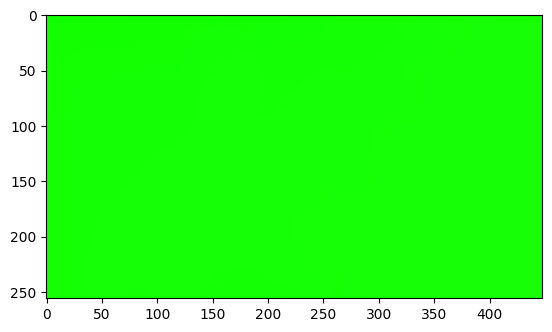

In [7]:
import os

vimeo_path = '/workspace/data/vimeo/train'
vimeo_folder = os.listdir(vimeo_path)
vimeo_folder.sort()

for scene in vimeo_folder:
    flow_path = os.path.join(vimeo_path,scene,'flow','flows',f'{scene}.flo')
    flow = flow_utils.flow_read(flow_path)
    flow_rgb,mag = flow_to_rgb_origin(flow)

    flow_rgb = flow_rgb[:,:,::-1]
    cv2.imwrite('tt.png',flow_rgb*255)
    plt.imshow(flow_rgb)
    break


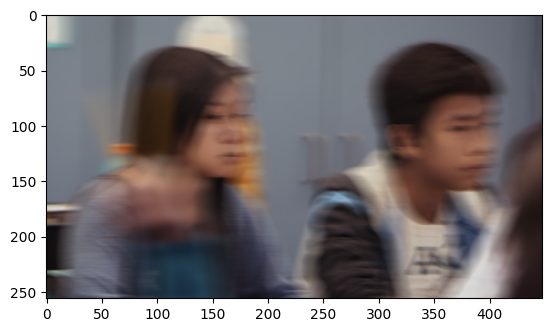

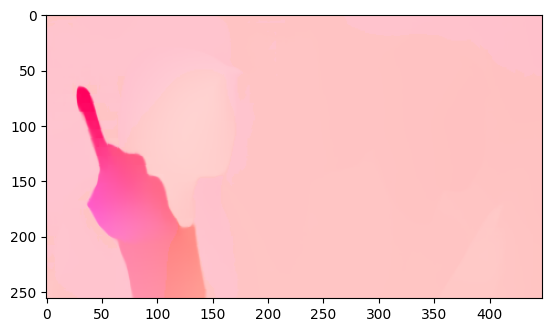

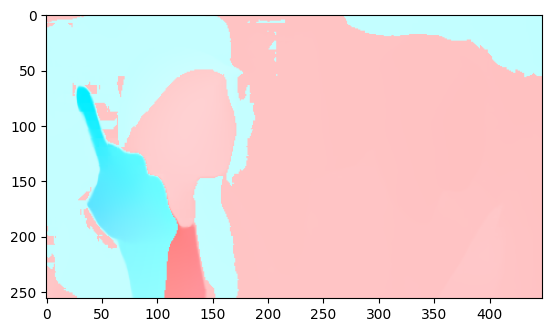

In [60]:
from PIL import Image
scene = '000035'

blur = f'/workspace/data/vimeo/train/{scene}/blur/{scene}.png'
blur = Image.open(blur)
blur = np.array(blur)
plt.imshow(blur)
plt.show()


rgb = f'/workspace/data/vimeo/train/{scene}/flow/flows_viz/{scene}.png'
rgb = Image.open(rgb)
rgb = np.array(rgb)
plt.imshow(rgb)
plt.show()

flow_path = f'/workspace/data/vimeo/train/{scene}/flow/flows/{scene}.flo'
flow = flow_utils.flow_read(flow_path)
flow_rgb, max_mag = flow_to_rgb_origin(flow)

a,b,c = cv2.split(flow_rgb)
flow_rgb = cv2.merge((c,a,b))

plt.imshow(flow_rgb)
plt.show()


In [61]:
rgb[0,0,:]

array([255, 196, 196], dtype=uint8)

In [62]:
f = flow_rgb*255
print(f[0,0,:])

[255.      196.31084 196.40472]


In [63]:
"""This code is mostly taken and adapted from flowpy.

https://gitlab-research.centralesupelec.fr/2018seznecm/flowpy
"""

#
# Original license below
#
# MIT License
#
# Copyright (c) 2020 Univ. Paris-Saclay, CNRS, CentraleSupelec,
#                    Thales Research & Technology
#
# Permission is hereby granted, free of charge, to any person obtaining a copy
# of this software and associated documentation files (the "Software"), to deal
# in the Software without restriction, including without limitation the rights
# to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
# copies of the Software, and to permit persons to whom the Software is
# furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in all
# copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
# AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
# OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
# SOFTWARE.


import numpy as np
from pathlib import Path
from warnings import warn
import png
import struct
from collections import namedtuple
from itertools import accumulate

DEFAULT_TRANSITIONS = (15, 6, 4, 11, 13, 6)


def flow_to_rgb(
    flow, flow_max_radius=None, background="bright", custom_colorwheel=None
):
    """
    Creates a RGB representation of an optical flow.

    Parameters
    ----------
    flow: numpy.ndarray
        3D flow in the HWF (Height, Width, Flow) layout.
        flow[..., 0] should be the x-displacement
        flow[..., 1] should be the y-displacement

    flow_max_radius: float, optional
        Set the radius that gives the maximum color intensity, useful for comparing different flows.
        Default: The normalization is based on the input flow maximum radius.

    background: str, optional
        States if zero-valued flow should look 'bright' or 'dark'
        Default: "bright"

    custom_colorwheel: numpy.ndarray
        Use a custom colorwheel for specific hue transition lengths.
        By default, the default transition lengths are used.

    Returns
    -------
    rgb_image: numpy.ndarray
        A 2D RGB image that represents the flow

    Raises
    ------
    ValueError
        If the background is invalid.

    See Also
    --------
    make_colorwheel

    """
    valid_backgrounds = ("bright", "dark")
    if background not in valid_backgrounds:
        raise ValueError(
            f"background should be one the following: {valid_backgrounds}, not {background}"
        )

    wheel = make_colorwheel() if custom_colorwheel is None else custom_colorwheel

    complex_flow = flow[..., 0] + 1j * flow[..., 1]
    complex_flow, nan_mask = replace_nans(complex_flow)

    radius, angle = np.abs(complex_flow), np.angle(complex_flow)

    if flow_max_radius is None:
        flow_max_radius = np.max(radius)

    if flow_max_radius > 0:
        radius /= flow_max_radius



    ncols = len(wheel)

    # Map the angles from (-pi, pi] to [0, 2pi) to [0, ncols - 1)
    angle[angle < 0] += 2 * np.pi
    angle = angle * ((ncols - 1) / (2 * np.pi))

    # Make the wheel cyclic for interpolation
    wheel = np.vstack((wheel, wheel[0]))

    # Interpolate the hues
    (angle_fractional, angle_floor), angle_ceil = np.modf(angle), np.ceil(angle)
    angle_fractional = angle_fractional.reshape((angle_fractional.shape) + (1,))
    float_hue = (
        wheel[angle_floor.astype(np.int32)] * (1 - angle_fractional)
        + wheel[angle_ceil.astype(np.int32)] * angle_fractional
    )

    ColorizationArgs = namedtuple(
        "ColorizationArgs",
        ["move_hue_valid_radius", "move_hue_oversized_radius", "invalid_color"],
    )

    def move_hue_on_V_axis(hues, factors):
        return hues * np.expand_dims(factors, -1)

    def move_hue_on_S_axis(hues, factors):
        return 255.0 - np.expand_dims(factors, -1) * (255.0 - hues)

    if background == "dark":
        parameters = ColorizationArgs(
            move_hue_on_V_axis,
            move_hue_on_S_axis,
            np.array([255, 255, 255], dtype=np.float32),
        )
    else:
        parameters = ColorizationArgs(
            move_hue_on_S_axis,
            move_hue_on_V_axis,
            np.array([0, 0, 0], dtype=np.float32),
        )

    colors = parameters.move_hue_valid_radius(float_hue, radius)

    oversized_radius_mask = radius > 1
    colors[oversized_radius_mask] = parameters.move_hue_oversized_radius(
        float_hue[oversized_radius_mask], 1 / radius[oversized_radius_mask]
    )
    colors[nan_mask] = parameters.invalid_color

    return colors.astype(np.uint8)


def make_colorwheel(transitions=DEFAULT_TRANSITIONS):
    """
    Creates a color wheel.

    A color wheel defines the transitions between the six primary hues:
    Red(255, 0, 0), Yellow(255, 255, 0), Green(0, 255, 0), Cyan(0, 255, 255), Blue(0, 0, 255) and Magenta(255, 0, 255).

    Parameters
    ----------
    transitions: sequence_like
        Contains the length of the six transitions.
        Defaults to (15, 6, 4, 11, 13, 6), based on humain perception.

    Returns
    -------
    colorwheel: numpy.ndarray
        The RGB values of the transitions in the color space.

    Notes
    -----
    For more information, take a look at
    https://web.archive.org/web/20051107102013/http://members.shaw.ca/quadibloc/other/colint.htm

    """

    colorwheel_length = sum(transitions)

    # The red hue is repeated to make the color wheel cyclic
    base_hues = map(
        np.array,
        (
            [255, 0, 0],
            [255, 255, 0],
            [0, 255, 0],
            [0, 255, 255],
            [0, 0, 255],
            [255, 0, 255],
            [255, 0, 0],
        ),
    )

    colorwheel = np.zeros((colorwheel_length, 3), dtype="uint8")
    hue_from = next(base_hues)
    start_index = 0
    for hue_to, end_index in zip(base_hues, accumulate(transitions)):
        transition_length = end_index - start_index

        colorwheel[start_index:end_index] = np.linspace(
            hue_from, hue_to, transition_length, endpoint=False
        )
        hue_from = hue_to
        start_index = end_index

    return colorwheel


def replace_nans(array, value=0):
    nan_mask = np.isnan(array)
    array[nan_mask] = value

    return array, nan_mask


def flow_write(output_file, flow, format=None):
    """
    Writes optical flow to file.

    Parameters
    ----------
    output_file: {str, pathlib.Path, file}
        Path of the file to write or file object.
    flow: numpy.ndarray
        3D flow in the HWF (Height, Width, Flow) layout.
        flow[..., 0] should be the x-displacement
        flow[..., 1] should be the y-displacement
    format: str, optional
        Specify in what format the flow is written, accepted formats: "png" or "flo"
        If None, it is guessed on the file extension

    See Also
    --------
    flow_read

    """

    output_format = guess_extension(output_file, override=format)

    with FileManager(output_file, "wb") as f:
        if output_format == "png":
            flow_write_png(f, flow)
        else:
            flow_write_flo(f, flow)


def flow_read(input_file, format=None):
    """
    Reads optical flow from file

    Parameters
    ----------
    input_file: {str, pathlib.Path, file}
        Path of the file to read or file object.
    format: str, optional
        Specify in what format the flow is read, accepted formats: "png" or "flo"
        If None, it is guess on the file extension

    Returns
    -------
    flow: numpy.ndarray
        3D flow in the HWF (Height, Width, Flow) layout.
        flow[..., 0] is the x-displacement
        flow[..., 1] is the y-displacement

    Notes
    -----

    The flo format is dedicated to optical flow and was first used in Middlebury optical flow database.
    The original definition can be found here: http://vision.middlebury.edu/flow/code/flow-code/flowIO.cpp

    The png format uses 16-bit RGB png to store optical flows.
    It was developped along with the KITTI Vision Benchmark Suite.
    More information can be found here: http://www.cvlibs.net/datasets/kitti/eval_scene_flow.php?benchmark=flow

    The both handle flow with invalid ``invalid'' values, to deal with occlusion for example.
    We convert such invalid values to NaN.

    See Also
    --------
    flow_write

    """

    input_format = guess_extension(input_file, override=format)

    with FileManager(input_file, "rb") as f:
        if input_format == "png":
            output = flow_read_png(f)
        else:
            output = flow_read_flo(f)

    return output


def flow_read_flo(f):
    if f.read(4) != b"PIEH":
        warn(f"{f.name} does not have a .flo file signature")

    width, height = struct.unpack("II", f.read(8))
    result = np.fromfile(f, dtype="float32").reshape((height, width, 2))

    # Set invalid flows to NaN
    mask_u = np.greater(np.abs(result[..., 0]), 1e9, where=(~np.isnan(result[..., 0])))
    mask_v = np.greater(np.abs(result[..., 1]), 1e9, where=(~np.isnan(result[..., 1])))

    result[mask_u | mask_v] = np.NaN

    return result


def flow_write_flo(f, flow):
    SENTINEL = 1666666800.0  # Only here to look like Middlebury original files
    height, width, _ = flow.shape

    image = flow.copy()
    image[np.isnan(image)] = SENTINEL

    f.write(b"PIEH")
    f.write(struct.pack("II", width, height))
    image.astype(np.float32).tofile(f)


def flow_read_png(f):
    width, height, stream, *_ = png.Reader(f).read()

    file_content = np.concatenate(list(stream)).reshape((height, width, 3))
    flow, valid = file_content[..., 0:2], file_content[..., 2]

    flow = (flow.astype(np.float32) - 2**15) / 64.0

    flow[~valid.astype(bool)] = np.NaN

    return flow


def flow_write_png(f, flow):
    SENTINEL = 0.0  # Only here to look like original KITTI files
    height, width, _ = flow.shape
    flow_copy = flow.copy()

    valid = ~(np.isnan(flow[..., 0]) | np.isnan(flow[..., 1]))
    flow_copy[~valid] = SENTINEL

    flow_copy = (flow_copy * 64.0 + 2**15).astype(np.uint16)
    image = np.dstack((flow_copy, valid))

    writer = png.Writer(width, height, bitdepth=16, greyscale=False)
    writer.write(f, image.reshape((height, 3 * width)))


class FileManager:
    def __init__(self, abstract_file, mode):
        self.abstract_file = abstract_file
        self.opened_file = None
        self.mode = mode

    def __enter__(self):
        if isinstance(self.abstract_file, str):
            self.opened_file = open(self.abstract_file, self.mode)
        elif isinstance(self.abstract_file, Path):
            self.opened_file = self.abstract_file.open(self.mode)
        else:
            return self.abstract_file

        return self.opened_file

    def __exit__(self, exc_type, exc_value, traceback):
        if self.opened_file is not None:
            self.opened_file.close()


def guess_extension(abstract_file, override=None):
    if override is not None:
        return override

    if isinstance(abstract_file, str):
        return Path(abstract_file).suffix[1:]
    elif isinstance(abstract_file, Path):
        return abstract_file.suffix[1:]

    return Path(abstract_file.name).suffix[1:]


import numpy as np

def rgb_to_flow(rgb_image, flow_max_radius, custom_colorwheel=None):
    """
    Converts a RGB representation of an optical flow back to the flow data.

    Parameters
    ----------
    rgb_image: numpy.ndarray
        2D RGB image that represents the flow
    flow_max_radius: float, optional
        The radius that gives the maximum color intensity, useful for comparing different flows.
        Default: 30
    custom_colorwheel: numpy.ndarray
        Use a custom colorwheel for specific hue transition lengths.
        By default, the default transition lengths are used.

    Returns
    -------
    flow: numpy.ndarray
        3D flow in the HWF (Height, Width, Flow) layout.
        flow[..., 0] is the x-displacement
        flow[..., 1] is the y-displacement

    See Also
    --------
    flow_to_rgb, make_colorwheel
    """
    wheel = make_colorwheel() if custom_colorwheel is None else custom_colorwheel
    ncols = len(wheel)

    # Normalize the RGB image
    rgb_image = rgb_image.astype(np.float32) / 255.0

    # Find the angles and magnitudes from the color wheel
    wheel = np.vstack((wheel, wheel[0]))

    angle = np.zeros((rgb_image.shape[0], rgb_image.shape[1]), dtype=np.float32)
    radius = np.zeros_like(angle)

    for i in range(ncols):
        diff = np.linalg.norm(rgb_image - wheel[i], axis=-1)
        mask = diff < np.linalg.norm(rgb_image - wheel[(i + 1) % ncols], axis=-1)
        angle[mask] = (i + diff[mask] / (diff[mask] + np.linalg.norm(rgb_image[mask] - wheel[(i + 1) % ncols], axis=-1))) * (2 * np.pi / ncols)

    # Compute radius from the RGB values
    max_rgb = np.max(rgb_image, axis=-1)
    min_rgb = np.min(rgb_image, axis=-1)
    radius = max_rgb - min_rgb

    # Reverse the angle and radius normalization
    radius *= flow_max_radius

    # Convert polar coordinates back to cartesian coordinates
    flow_x = radius * np.cos(angle)
    flow_y = radius * np.sin(angle)

    # Combine the flow channels
    flow = np.dstack((flow_y, flow_x))

    return flow




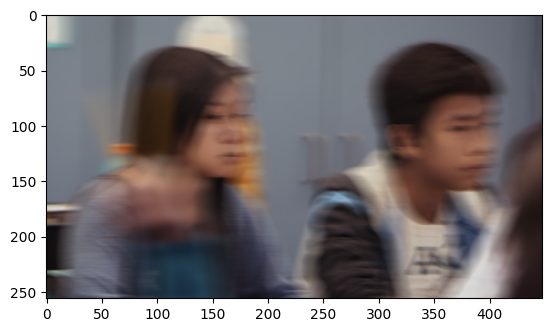

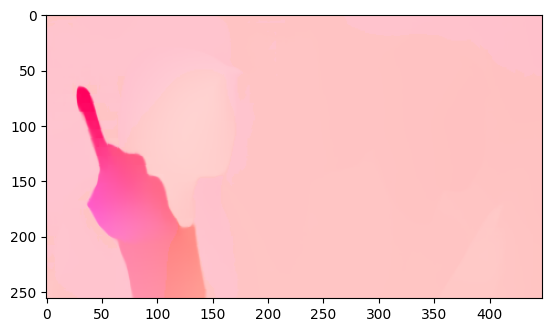

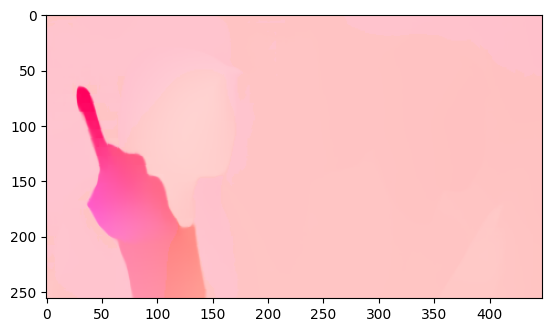

In [66]:
from PIL import Image
scene = '000035'

blur = f'/workspace/data/vimeo/train/{scene}/blur/{scene}.png'
blur = Image.open(blur)
blur = np.array(blur)
plt.imshow(blur)
plt.show()


rgb = f'/workspace/data/vimeo/train/{scene}/flow/flows_viz/{scene}.png'
rgb = Image.open(rgb)
rgb = np.array(rgb)
plt.imshow(rgb)
plt.show()

flow_path = f'/workspace/data/vimeo/train/{scene}/flow/flows/{scene}.flo'
flow = flow_utils.flow_read(flow_path)
flow_rgb = flow_to_rgb(flow)

# a,b,c = cv2.split(flow_rgb)
# flow_rgb = cv2.merge((c,a,b))

plt.imshow(flow_rgb)
plt.show()
